In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv('bank-data.csv')

In [6]:
print(data.head())

        id  age     sex      region   income married  children  car save_act  \
0  ID12101   48  FEMALE  INNER_CITY  17546.0      NO         1   NO       NO   
1  ID12102   40    MALE        TOWN  30085.1     YES         3  YES       NO   
2  ID12103   51  FEMALE  INNER_CITY  16575.4     YES         0  YES      YES   
3  ID12104   23  FEMALE        TOWN  20375.4     YES         3   NO       NO   
4  ID12105   57  FEMALE       RURAL  50576.3     YES         0   NO      YES   

  current_act mortgage  pep  
0          NO       NO  YES  
1         YES      YES   NO  
2         YES       NO   NO  
3         YES       NO   NO  
4          NO       NO   NO  


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           600 non-null    object 
 1   age          600 non-null    int64  
 2   sex          600 non-null    object 
 3   region       600 non-null    object 
 4   income       600 non-null    float64
 5   married      600 non-null    object 
 6   children     600 non-null    int64  
 7   car          600 non-null    object 
 8   save_act     600 non-null    object 
 9   current_act  600 non-null    object 
 10  mortgage     600 non-null    object 
 11  pep          600 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 56.4+ KB


# Análise Exploratória de Dados (EDA)

### Análise da distribuição das variáveis numéricas (Idade e Renda)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


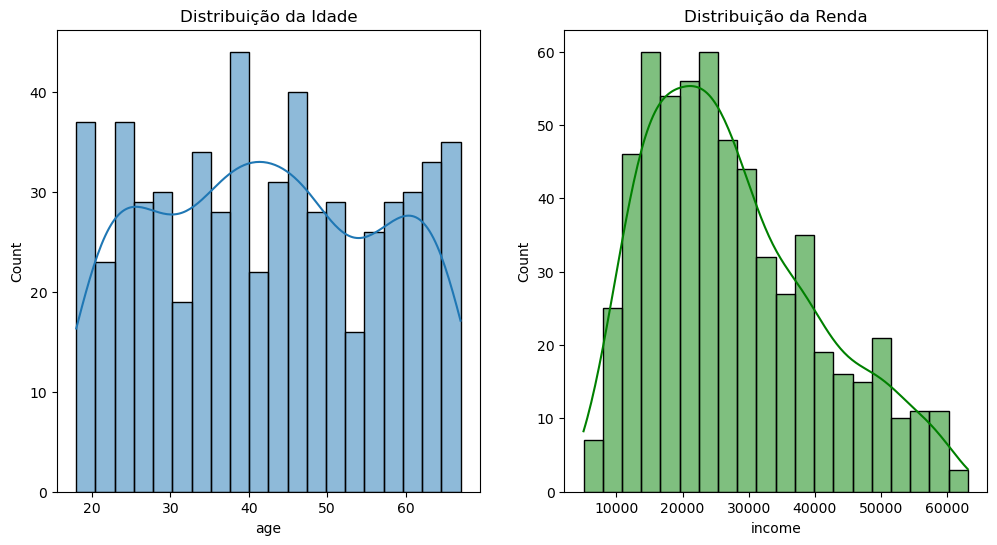

In [10]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['age'], bins=20, kde=True)
plt.title('Distribuição da Idade')

plt.subplot(1, 2, 2)
sns.histplot(data['income'], bins=20, kde=True, color='green')
plt.title('Distribuição da Renda')
plt.show()


### Análise das variáveis categóricas

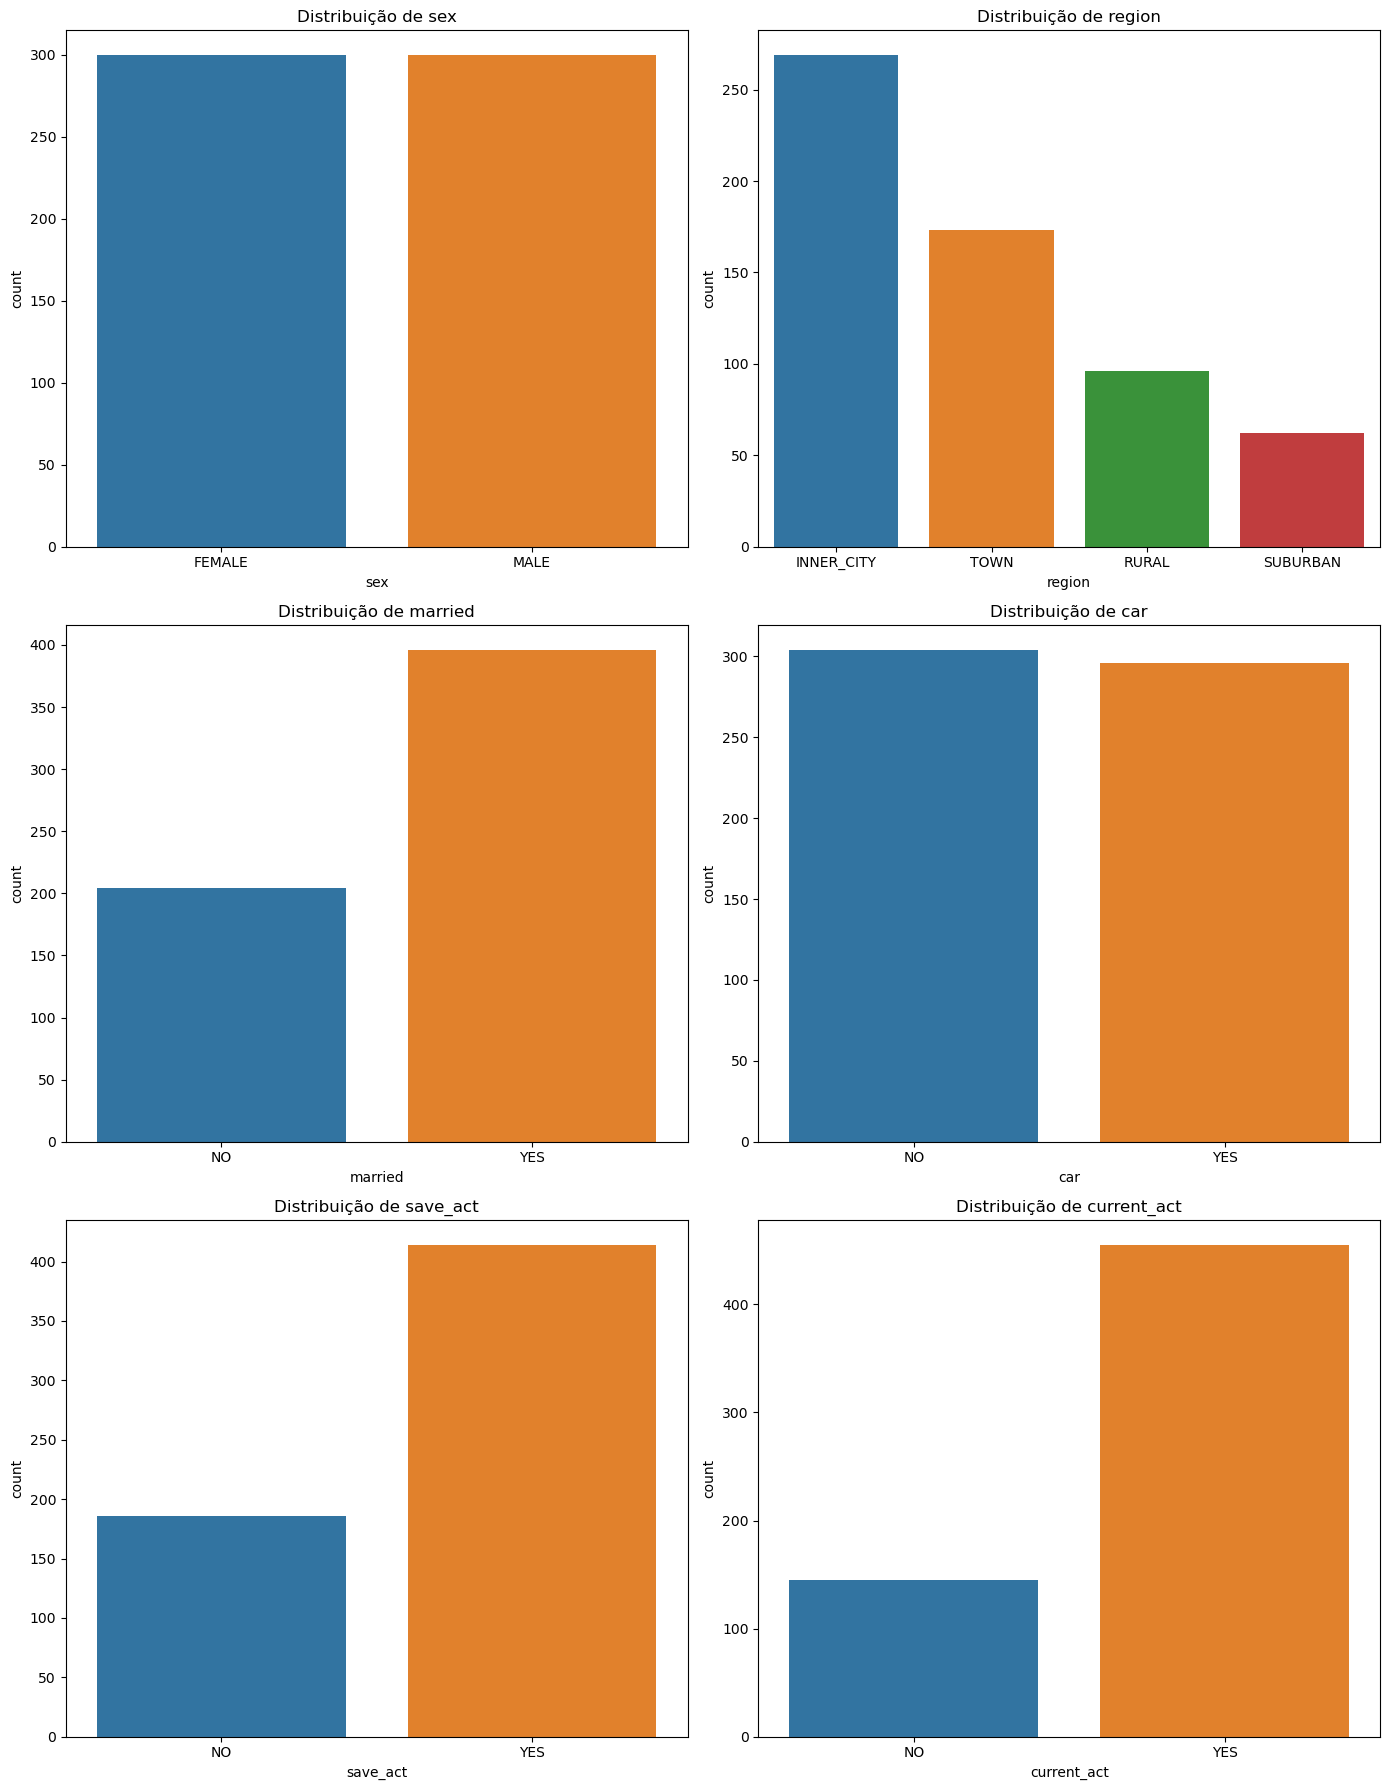

In [11]:
fig, axes = plt.subplots(3, 2, figsize=(14, 18))
categorias = ['sex', 'region', 'married', 'car', 'save_act', 'current_act']
for i, cat in enumerate(categorias):
    row = i // 2
    col = i % 2
    sns.countplot(x=cat, data=data, ax=axes[row, col])
    axes[row, col].set_title(f'Distribuição de {cat}')
plt.tight_layout()
plt.show()


### Análise de correlação entre variáveis

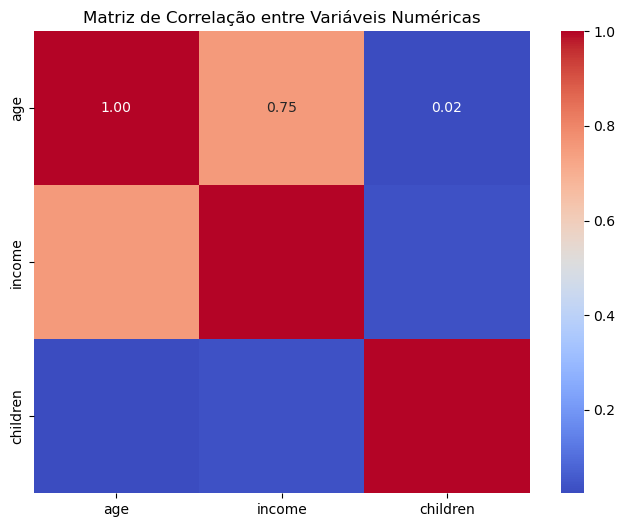

In [13]:
# Excluindo colunas categóricas e o identificador 'id' antes de calcular a correlação
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Calculando a matriz de correlação
correlation = numeric_data.corr()

# Visualizando a matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()


# Pré-processamento de Dados

In [14]:
# verificando os valores ausentes
print(data.isnull().sum())

id             0
age            0
sex            0
region         0
income         0
married        0
children       0
car            0
save_act       0
current_act    0
mortgage       0
pep            0
dtype: int64


In [17]:
# codificação de Variáveis Categóricas  
# utilizando One-Hot Encoding 
data_encoded = pd.get_dummies(data, columns=['sex', 'region', 'married', 'car', 'save_act', 'current_act', 'mortgage', 'pep'])
print(data_encoded.head())


        id  age   income  children  sex_FEMALE  sex_MALE  region_INNER_CITY  \
0  ID12101   48  17546.0         1        True     False               True   
1  ID12102   40  30085.1         3       False      True              False   
2  ID12103   51  16575.4         0        True     False               True   
3  ID12104   23  20375.4         3        True     False              False   
4  ID12105   57  50576.3         0        True     False              False   

   region_RURAL  region_SUBURBAN  region_TOWN  ...  car_NO  car_YES  \
0         False            False        False  ...    True    False   
1         False            False         True  ...   False     True   
2         False            False        False  ...   False     True   
3         False            False         True  ...    True    False   
4          True            False        False  ...    True    False   

   save_act_NO  save_act_YES  current_act_NO  current_act_YES  mortgage_NO  \
0         True      

In [20]:
# Normalização/Padronização

from sklearn.preprocessing import StandardScaler

# Criando o objeto StandardScaler
scaler = StandardScaler()

# Colunas que desejamos normalizar
columns_to_scale = ['age', 'income']

# Aplicando a normalização nas colunas especificadas
data_encoded[columns_to_scale] = scaler.fit_transform(data_encoded[columns_to_scale])
print(data_encoded.head())


        id       age    income  children  sex_FEMALE  sex_MALE  \
0  ID12101  0.388887 -0.774168         1        True     False   
1  ID12102 -0.166170  0.198706         3       False      True   
2  ID12103  0.597034 -0.849474         0        True     False   
3  ID12104 -1.345667 -0.554643         3        True     False   
4  ID12105  1.013327  1.788562         0        True     False   

   region_INNER_CITY  region_RURAL  region_SUBURBAN  region_TOWN  ...  car_NO  \
0               True         False            False        False  ...    True   
1              False         False            False         True  ...   False   
2               True         False            False        False  ...   False   
3              False         False            False         True  ...    True   
4              False          True            False        False  ...    True   

   car_YES  save_act_NO  save_act_YES  current_act_NO  current_act_YES  \
0    False         True         False     

# Seleção de Features e Modelagem

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import numpy as np


In [24]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-NN': KNeighborsClassifier(),
    'SVM': SVC()
}


In [36]:
# Supondo que 'data' é seu DataFrame
X = data.drop(['id', 'pep'], axis=1)  # Removendo as colunas 'id' e 'pep'

X = pd.get_dummies(X, drop_first=True)  

# Definindo 'y'
y = data['pep'].map({'YES': 1, 'NO': 0})  # Convertendo 'YES'/'NO' para 1/0


In [37]:
results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5)  # cv=5 define que a validação cruzada será de 5 folds
    results[name] = cv_scores
    print(f'{name}: {cv_scores.mean():.2f} +/- {cv_scores.std():.2f}')

Logistic Regression: 0.57 +/- 0.03
Decision Tree: 0.83 +/- 0.02
K-NN: 0.57 +/- 0.03
SVM: 0.57 +/- 0.04
